In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.utils.class_weight import compute_class_weight

In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "data"));

In [3]:
df = pd.read_csv("combined-season-data.csv", index_col=False);

In [4]:
df.head()

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,...,own_goals_pgw,penalties_missed_pgw,penalties_saved_pgw,red_cards_pgw,result_pgw,saves_pgw,threat_pgw,yellow_cards_pgw,total_points_pgw,total_points
0,2016,1,0,1,4,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2016,1,1,2,17,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2016,1,1,4,9,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2016,1,0,6,13,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2016,1,1,7,20,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,71132.0,2017.063305,0.902744,2016.0,2016.0,2017.0,2018.0,2019.0
GW,71132.0,19.506144,11.348698,1.0,9.0,20.0,30.0,38.0
at_home,71132.0,0.499958,0.500004,0.0,0.0,0.0,1.0,1.0
player_id,71132.0,487.790418,295.640147,1.0,240.0,478.0,702.0,1211.0
opponent_id,71132.0,12.042934,7.275230,1.0,5.0,11.0,18.0,29.0
champion_ls,71132.0,0.050273,0.218509,0.0,0.0,0.0,0.0,1.0
top5_ls,71132.0,0.250211,0.433137,0.0,0.0,0.0,1.0,1.0
bottom5_ls,71132.0,0.249480,0.432715,0.0,0.0,0.0,0.0,1.0
promoted_ts,71132.0,0.149722,0.356801,0.0,0.0,0.0,0.0,1.0
assists_pgw,71132.0,0.039476,0.211277,0.0,0.0,0.0,0.0,3.0


In [6]:
df.columns

Index(['season', 'GW', 'at_home', 'player_id', 'opponent_id', 'champion_ls',
       'top5_ls', 'bottom5_ls', 'promoted_ts', 'assists_pgw', 'bonus_pgw',
       'bps_pgw', 'clean_sheets_pgw', 'creativity_pgw', 'goals_conceded_pgw',
       'goals_scored_pgw', 'ict_index_pgw', 'influence_pgw', 'minutes_pgw',
       'own_goals_pgw', 'penalties_missed_pgw', 'penalties_saved_pgw',
       'red_cards_pgw', 'result_pgw', 'saves_pgw', 'threat_pgw',
       'yellow_cards_pgw', 'total_points_pgw', 'total_points'],
      dtype='object')

In [7]:
df.dtypes

season                    int64
GW                        int64
at_home                   int64
player_id                 int64
opponent_id               int64
champion_ls               int64
top5_ls                   int64
bottom5_ls                int64
promoted_ts               int64
assists_pgw             float64
bonus_pgw               float64
bps_pgw                 float64
clean_sheets_pgw        float64
creativity_pgw          float64
goals_conceded_pgw      float64
goals_scored_pgw        float64
ict_index_pgw           float64
influence_pgw           float64
minutes_pgw             float64
own_goals_pgw           float64
penalties_missed_pgw    float64
penalties_saved_pgw     float64
red_cards_pgw           float64
result_pgw              float64
saves_pgw               float64
threat_pgw              float64
yellow_cards_pgw        float64
total_points_pgw        float64
total_points              int64
dtype: object

In [8]:
df.isnull().sum()

season                  0
GW                      0
at_home                 0
player_id               0
opponent_id             0
champion_ls             0
top5_ls                 0
bottom5_ls              0
promoted_ts             0
assists_pgw             0
bonus_pgw               0
bps_pgw                 0
clean_sheets_pgw        0
creativity_pgw          0
goals_conceded_pgw      0
goals_scored_pgw        0
ict_index_pgw           0
influence_pgw           0
minutes_pgw             0
own_goals_pgw           0
penalties_missed_pgw    0
penalties_saved_pgw     0
red_cards_pgw           0
result_pgw              0
saves_pgw               0
threat_pgw              0
yellow_cards_pgw        0
total_points_pgw        0
total_points            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,season,GW,at_home,player_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,assists_pgw,bonus_pgw,bps_pgw,clean_sheets_pgw,creativity_pgw,goals_conceded_pgw,goals_scored_pgw,ict_index_pgw,influence_pgw,minutes_pgw,own_goals_pgw,penalties_missed_pgw,penalties_saved_pgw,red_cards_pgw,result_pgw,saves_pgw,threat_pgw,yellow_cards_pgw,total_points_pgw,total_points
season,1,-0.15,0.00027,0.4,0.17,0.0014,-0.00035,0.00085,-0.00031,0.0053,0.0049,0.003,-0.0015,0.0029,0.017,0.0063,0.015,0.024,0.019,0.0014,-0.0032,-0.0013,0.0042,-0.00066,0.0044,0.0079,-0.0062,0.012,0.02
GW,-0.15,1,0.00071,-0.024,-0.02,0.0015,0.006,-0.0014,-0.002,-0.0041,-0.0017,-0.0046,0.0077,-0.0057,-0.012,-0.0043,-0.0054,-0.0074,-0.0067,-0.0015,-0.00063,-0.0014,-0.0072,-0.0074,-0.0019,-0.00075,-0.0062,-0.0022,-0.031
at_home,0.00027,0.00071,1,0.00077,0.0011,-0.00075,-0.00041,-0.0018,0.00082,-0.014,-0.014,-0.014,-0.018,-0.022,0.032,-0.015,-0.022,-0.0079,0.00029,0.0063,-0.0068,0.008,0.0033,-0.096,0.0071,-0.024,2e-05,-0.019,0.045
player_id,0.4,-0.024,0.00077,1,0.048,-4.4e-05,0.0053,0.0024,-0.019,-0.022,-0.013,-0.046,-0.028,-0.038,-0.012,-0.0086,-0.034,-0.031,-0.037,-0.001,-0.004,0.0021,0.0039,-0.047,-0.0023,-0.017,-0.015,-0.032,-0.029
opponent_id,0.17,-0.02,0.0011,0.048,1,-0.15,-0.22,0.14,0.36,0.0054,-0.00015,0.002,-0.00049,0.003,0.0059,0.00045,0.0049,0.0059,0.0046,0.0041,-0.0058,0.00087,0.0023,-0.0018,0.0067,0.003,0.0047,0.002,0.041
champion_ls,0.0014,0.0015,-0.00075,-4.4e-05,-0.15,1,0.4,-0.13,-0.097,-0.0016,-0.0031,-0.0028,0.00075,-0.00073,0.00095,-0.00012,-2e-05,0.00054,-0.00058,-0.002,0.0011,0.0075,0.005,-0.023,0.0017,0.00035,0.0065,-0.0019,-0.02
top5_ls,-0.00035,0.006,-0.00041,0.0053,-0.22,0.4,1,-0.33,-0.24,0.0047,0.0015,0.0036,0.0033,0.0046,-0.014,0.0059,0.0054,0.0033,6.8e-05,-0.0015,-0.0044,0.0029,-0.0045,0.022,-0.0019,0.0054,0.0022,0.0062,-0.063
bottom5_ls,0.00085,-0.0014,-0.0018,0.0024,0.14,-0.13,-0.33,1,-0.24,0.00022,0.0037,0.00072,0.01,-8.1e-05,-0.0057,-0.003,-0.0013,-0.00059,0.0011,0.0037,0.00082,-0.0017,-0.0007,0.01,0.0019,-0.0023,0.0039,0.0029,0.037
promoted_ts,-0.00031,-0.002,0.00082,-0.019,0.36,-0.097,-0.24,-0.24,1,0.00048,-5.2e-05,0.0018,-0.0035,-0.0029,0.0027,0.0012,-0.00057,0.0033,0.00049,-0.00044,-0.003,0.0069,0.003,-0.0013,0.0056,-0.0021,0.0013,8.5e-05,0.035
assists_pgw,0.0053,-0.0041,-0.014,-0.022,0.0054,-0.0016,0.0047,0.00022,0.00048,1,0.31,0.4,0.13,0.41,0.1,0.12,0.41,0.38,0.22,0.0069,0.013,-0.0051,0.009,0.12,-0.027,0.25,0.053,0.45,0.14


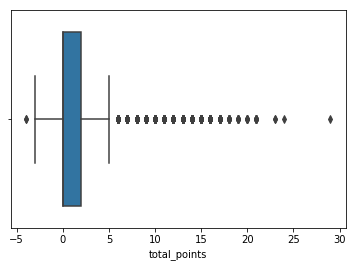

In [11]:
sns.boxplot(x=df['total_points'])

(array([3.4600e+02, 5.9859e+04, 4.3870e+03, 5.1110e+03, 8.6700e+02,
        4.3000e+02, 1.1000e+02, 1.8000e+01, 3.0000e+00, 1.0000e+00]),
 array([-4. , -0.7,  2.6,  5.9,  9.2, 12.5, 15.8, 19.1, 22.4, 25.7, 29. ]),
 <a list of 10 Patch objects>)

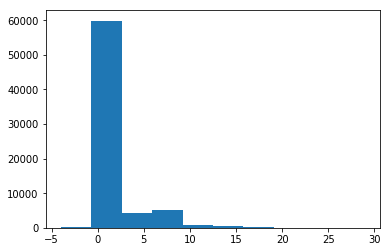

In [12]:
plt.hist(df["total_points"])

In [13]:
distribution_df = pd.DataFrame();

In [14]:
distribution_df["points"] = np.unique(df["total_points"])

In [15]:
def countPoints(point):
    return df[df["total_points"] == point].shape[0]

In [16]:
distribution_df["data_count"] = distribution_df["points"].apply(lambda point: countPoints(point))

In [17]:
distribution_df["data_percent"] = distribution_df["data_count"].apply(lambda count: round(count / df.shape[0] * 100, 3))

In [18]:
distribution_df

,points,data_count,data_percent
0,-4,2,0.003
1,-3,16,0.022
2,-2,86,0.121
3,-1,242,0.340
4,0,39638,55.725
5,1,10810,15.197
6,2,9411,13.230
7,3,2588,3.638
8,4,579,0.814
9,5,1220,1.715


In [19]:
outlier_threshold = 1.0;

In [20]:
outlier_points = list(distribution_df[distribution_df["data_percent"] <= outlier_threshold]["points"])

In [21]:
outlier_points

[-4,
 -3,
 -2,
 -1,
 4,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 29]

In [22]:
for outlier_point in outlier_points:
    instances = df[df["total_points"] == outlier_point];
    
    for index, row in instances.iterrows():
        player_id = row["player_id"];
        opponent_id = row["opponent_id"];
        
        check_df = df[(df["player_id"] == player_id) & (df["opponent_id"] == opponent_id)]
        if (check_df.shape[0] == 1):
            df = df.drop(df[df["total_points"] == outlier_point].index);
            df.reset_index(inplace=True, drop=True);
        else:
            average_score = np.mean(check_df["total_points"])
            df.loc[(df["player_id"] == player_id) & (df["opponent_id"] == opponent_id) & 
                   (df["total_points"] == outlier_point), 'total_points'] = average_score;
            
    print("Completed outlier point {}".format(outlier_point))

Completed outlier point -4
Completed outlier point -3
Completed outlier point -2
Completed outlier point -1
Completed outlier point 4
Completed outlier point 9
Completed outlier point 10
Completed outlier point 11
Completed outlier point 12
Completed outlier point 13
Completed outlier point 14
Completed outlier point 15
Completed outlier point 16
Completed outlier point 17
Completed outlier point 18
Completed outlier point 19
Completed outlier point 20
Completed outlier point 21
Completed outlier point 23
Completed outlier point 24
Completed outlier point 29


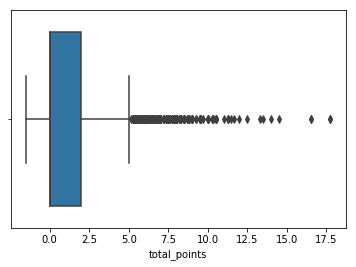

In [23]:
sns.boxplot(x=df['total_points'])

In [24]:
distribution_df = pd.DataFrame();
distribution_df["points"] = np.unique(df["total_points"])
distribution_df["data_count"] = distribution_df["points"].apply(lambda point: countPoints(point))
distribution_df["data_percent"] = distribution_df["data_count"].apply(lambda count: round(count / df.shape[0] * 100, 3))

In [25]:
distribution_df

,points,data_count,data_percent
0,-1.500000,1,0.001
1,-0.500000,17,0.025
2,-0.333333,1,0.001
3,-0.250000,5,0.007
4,-0.166667,1,0.001
5,0.000000,39651,57.426
6,0.166667,3,0.004
7,0.250000,1,0.001
8,0.285714,2,0.003
9,0.333333,2,0.003


In [26]:
# outlier_points = list(distribution_df[distribution_df["data_percent"] <= outlier_threshold]["points"])

In [27]:
# outlier_points

In [36]:
df.shape

(69047, 29)

In [29]:
# df = df[~df["total_points"].isin(outlier_points)]

In [30]:
# df.shape

In [31]:
# distribution_df = pd.DataFrame();
# distribution_df["points"] = np.unique(df["total_points"])
# distribution_df["data_count"] = distribution_df["points"].apply(lambda point: countPoints(point))
# distribution_df["data_percent"] = distribution_df["data_count"].apply(lambda count: round(count / df.shape[0] * 100, 3))

In [32]:
# distribution_df

In [33]:
df.to_csv("combined-season-data.csv", index=False);